In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
data=fetch_california_housing(as_frame=True)
df=pd.concat([data.data,data.target.rename('MedHouseVal')], axis=1)
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

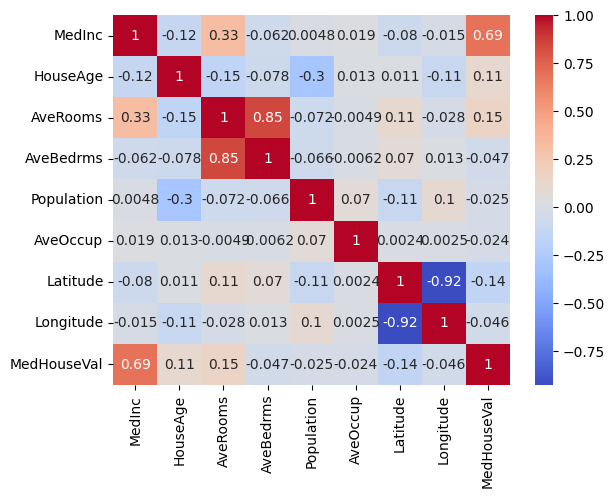

In [17]:
df.describe()
df.isnull().sum()
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [18]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='MedHouseVal')
y=df['MedHouseVal']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"MAE:{mae:3f}")
print(f"RMSE:{rmse:3f}")
print(f"R2:{r2:3f}")

MAE:0.533200
RMSE:0.745581
R2:0.575788


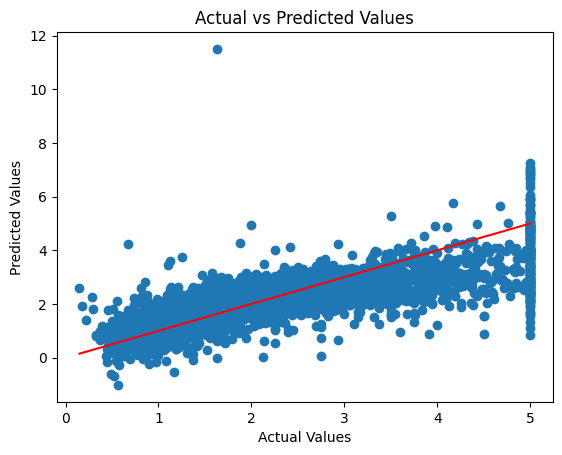

In [21]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.show()

In [22]:
sample_input=[[8.3252,41,6.9841,1.0238,322,2.5556,37.88,-122.23]]
predicted_output=model.predict(sample_input)
print(f"Predicted House Price:${predicted_output[0]:.2f}")

Predicted House Price:$4.15


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
